# AirBnB en Buenos Aires:
## vacaciones inolvidables en la "ciudad de la furia"


**Giamportone, Ariel Lujan**

**UpgradeHub 2024**

Las agencias de viaje que proporcionan paquetes armados para el turista podrían tener un interés particular en este trabajo. El mismo permite utilizar los datos de AirBnB para conocer la oferta de alojamiento en la Ciudad Autonoma de Buenos Aires y a la vez, garatizar cierta tranquilidad en lo que respecta a la ubicación de los alojamientos. 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

import os
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# mapas interactivos
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

#to make the plotly graphs
import plotly_express as px
from plotly.subplots import make_subplots
import matplotlib.font_manager as fm
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

#text mining
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud

## Recopilación de Datos


### Datos sobre alojamiento en AirBnB

In [2]:
print(os.listdir("input"))

['reviews.csv', 'listings.csv', 'neighbourhoods.geojson', 'calendar.csv', 'listings_details.csv', 'reviews_details.csv', 'delitos_CABA.csv', 'neighbourhoods.csv']


In [3]:
listings = pd.read_csv("input/listings.csv", index_col= "id", encoding='utf-8')
listings_details = pd.read_csv("input/listings_details.csv", index_col= "id", low_memory=False, encoding='utf-8')

calendar = pd.read_csv("input/calendar.csv", parse_dates=['date'], index_col=['listing_id'],encoding='utf-8')
reviews_details = pd.read_csv("input/reviews_details.csv", parse_dates=['date'],encoding='utf-8')
neighbourhoods_details= pd.read_csv("input/neighbourhoods.csv",encoding='utf-8')

In [4]:
listings_details.head()


,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
11508,https://www.airbnb.com/rooms/11508,20231226203815,2023-12-29,city scrape,Condo in Buenos Aires · ★4.79 · 1 bedroom · 1 ...,NaN,AREA: PALERMO SOHO<br /><br />Minutes walking ...,https://a0.muscache.com/pictures/19357696/b1de...,42762,https://www.airbnb.com/users/show/42762,...,4.97,4.92,4.87,NaN,f,1,1,0,0,0.28
14222,https://www.airbnb.com/rooms/14222,20231226203815,2023-12-28,city scrape,Rental unit in Palermo/Buenos Aires · ★4.77 · ...,NaN,Palermo is such a perfect place to explore the...,https://a0.muscache.com/pictures/4695637/bbae8...,87710233,https://www.airbnb.com/users/show/87710233,...,4.89,4.87,4.75,NaN,f,8,8,0,0,0.82
15074,https://www.airbnb.com/rooms/15074,20231226203815,2023-12-29,previous scrape,Rental unit in Buenos Aires · 1 bedroom · 1 be...,NaN,NaN,https://a0.muscache.com/pictures/91166/c0fdcb4...,59338,https://www.airbnb.com/users/show/59338,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
16695,https://www.airbnb.com/rooms/16695,20231226203815,2023-12-28,city scrape,Loft in Buenos Aires · ★4.28 · 1 bedroom · 1 b...,NaN,San Telmo is one of the best neighborhoods in ...,https://a0.muscache.com/pictures/619c33a9-0618...,64880,https://www.airbnb.com/users/show/64880,...,4.80,4.39,4.41,NaN,t,9,9,0,0,0.29
20062,https://www.airbnb.com/rooms/20062,20231226203815,2023-12-28,city scrape,Rental unit in Buenos Aires · ★4.93 · 2 bedroo...,NaN,NaN,https://a0.muscache.com/pictures/165679/2eb448...,75891,https://www.airbnb.com/users/show/75891,...,4.93,4.93,4.78,NaN,f,4,4,0,0,1.83


In [4]:
print(listings.shape)

(33490, 17)


In [5]:
reviews_details.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [6]:
listings_details.columns

Index(['listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar

In [7]:
listings.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')

In [8]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33490 entries, 11508 to 1054931988545514419
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            33490 non-null  object 
 1   host_id                         33490 non-null  int64  
 2   host_name                       33480 non-null  object 
 3   neighbourhood_group             0 non-null      float64
 4   neighbourhood                   33490 non-null  object 
 5   latitude                        33490 non-null  float64
 6   longitude                       33490 non-null  float64
 7   room_type                       33490 non-null  object 
 8   price                           32508 non-null  float64
 9   minimum_nights                  33490 non-null  int64  
 10  number_of_reviews               33490 non-null  int64  
 11  last_review                     27389 non-null  object 
 12  reviews_per_mo

In [9]:
listings = listings.drop(columns=['neighbourhood_group'])
listings.head()

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,
11508,Condo in Buenos Aires · ★4.79 · 1 bedroom · 1 ...,42762,Candela,Palermo,-34.581840,-58.424150,Entire home/apt,96921.0,3,39,2023-11-30,0.28,1,298,6,NaN
14222,Rental unit in Palermo/Buenos Aires · ★4.77 · ...,87710233,María,Palermo,-34.586170,-58.410360,Entire home/apt,32123.0,7,114,2023-11-30,0.82,8,161,12,NaN
15074,Rental unit in Buenos Aires · 1 bedroom · 1 be...,59338,Monica,Núñez,-34.538920,-58.465990,Private room,24230.0,29,0,NaN,NaN,1,0,0,NaN
16695,Loft in Buenos Aires · ★4.28 · 1 bedroom · 1 b...,64880,Elbio Mariano,Monserrat,-34.614390,-58.376110,Entire home/apt,40303.0,2,45,2019-11-30,0.29,9,0,0,NaN
20062,Rental unit in Buenos Aires · ★4.93 · 2 bedroo...,75891,Sergio Damian,Palermo,-34.581848,-58.441605,Entire home/apt,138876.0,2,303,2023-12-26,1.83,4,92,30,NaN


In [10]:
regex_pattern = r'(\d+\.\d+)'

listings['ratings'] = listings['name'].str.extract(regex_pattern, expand=False)

listings['ratings'] = pd.to_numeric(listings['ratings'], errors='coerce')

In [11]:
listings.head()

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,ratings
id,,,,,,,,,,,,,,,,,
11508,Condo in Buenos Aires · ★4.79 · 1 bedroom · 1 ...,42762,Candela,Palermo,-34.581840,-58.424150,Entire home/apt,96921.0,3,39,2023-11-30,0.28,1,298,6,NaN,4.79
14222,Rental unit in Palermo/Buenos Aires · ★4.77 · ...,87710233,María,Palermo,-34.586170,-58.410360,Entire home/apt,32123.0,7,114,2023-11-30,0.82,8,161,12,NaN,4.77
15074,Rental unit in Buenos Aires · 1 bedroom · 1 be...,59338,Monica,Núñez,-34.538920,-58.465990,Private room,24230.0,29,0,NaN,NaN,1,0,0,NaN,NaN
16695,Loft in Buenos Aires · ★4.28 · 1 bedroom · 1 b...,64880,Elbio Mariano,Monserrat,-34.614390,-58.376110,Entire home/apt,40303.0,2,45,2019-11-30,0.29,9,0,0,NaN,4.28
20062,Rental unit in Buenos Aires · ★4.93 · 2 bedroo...,75891,Sergio Damian,Palermo,-34.581848,-58.441605,Entire home/apt,138876.0,2,303,2023-12-26,1.83,4,92,30,NaN,4.93


### Valores nulos o NaN y sus consideraciones en cada columna

#### Listings

In [12]:
nan_counts = listings.isna().sum()
nan_counts

name                                  0
host_id                               0
host_name                            10
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                               982
minimum_nights                        0
number_of_reviews                     0
last_review                        6101
reviews_per_month                  6101
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           33044
ratings                            8798
dtype: int64

##### Host name
No es un valor relevante para el estudio del caso y por ello simplemente ser recurre a rellenar con el valor None:

In [13]:
listings['host_name'] = listings['host_name'].fillna(value="None")

##### Last review
No es un valor relevante para el estudio del caso y por ello simplemente ser recurre a rellenar con el valor None:

In [14]:
listings['last_review'] = listings['last_review'].fillna(value="None")

##### Reviews per month
No es un valor relevante para el estudio del caso y por ello simplemente ser recurre a rellenar con el valor None:

In [15]:
listings['reviews_per_month'] = listings['reviews_per_month'].fillna(value="None")

##### Ratings
No es un valor relevante para el estudio del caso y por ello simplemente ser recurre a rellenar con el valor None:

In [16]:
listings['ratings'] = listings['ratings'].fillna(value="None")

##### Verificación de valores nulos

In [17]:
nan_counts = listings.isna().sum()
nan_counts

name                                  0
host_id                               0
host_name                             0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                               982
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           33044
ratings                               0
dtype: int64

##### License
No es un valor relevante para el estudio del caso y por ello simplemente ser recurre a rellenar con el valor None:

In [18]:
listings = listings.drop(columns=['license'])
listings.head()

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,ratings
id,,,,,,,,,,,,,,,,
11508,Condo in Buenos Aires · ★4.79 · 1 bedroom · 1 ...,42762,Candela,Palermo,-34.581840,-58.424150,Entire home/apt,96921.0,3,39,2023-11-30,0.28,1,298,6,4.79
14222,Rental unit in Palermo/Buenos Aires · ★4.77 · ...,87710233,María,Palermo,-34.586170,-58.410360,Entire home/apt,32123.0,7,114,2023-11-30,0.82,8,161,12,4.77
15074,Rental unit in Buenos Aires · 1 bedroom · 1 be...,59338,Monica,Núñez,-34.538920,-58.465990,Private room,24230.0,29,0,None,None,1,0,0,None
16695,Loft in Buenos Aires · ★4.28 · 1 bedroom · 1 b...,64880,Elbio Mariano,Monserrat,-34.614390,-58.376110,Entire home/apt,40303.0,2,45,2019-11-30,0.29,9,0,0,4.28
20062,Rental unit in Buenos Aires · ★4.93 · 2 bedroo...,75891,Sergio Damian,Palermo,-34.581848,-58.441605,Entire home/apt,138876.0,2,303,2023-12-26,1.83,4,92,30,4.93


##### Precio
El valor de precios faltantes se puede completar por el método de KNN. Es sabido que los alojamientos se basan en la clasica regla de la "Elasticidad del Mercado" y los precios en general se regulan basado en los costos, además, AirBnB ayuda a fijar los precios en base a ese mercado local de oferta y demanda, y sus comisiones por pertenecer a la plataforma: https://www.airbnb.es/help/article/125

In [134]:
from sklearn.impute import KNNImputer

price_data = listings[['price']]

knn_imputer = KNNImputer(n_neighbors=3)

imputed_prices = knn_imputer.fit_transform(price_data)

listings['price'] = imputed_prices

In [135]:
nan_counts = listings.isna().sum()
nan_counts

id                                    0
name                                  0
host_id                               0
host_name                            10
neighbourhood_group               33490
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        6101
reviews_per_month                  6101
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           33044
dtype: int64

#### Listing details

In [21]:
pd.set_option('display.max_columns', None)

In [22]:
nan_counts = listings_details.isna().sum()
nan_counts

listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
name                                               0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               6101
Length: 74, dtype: int64

##### Precio

In [136]:
listings_details['price'] = listings_details['price'].replace('[\$,]', '', regex=True).astype(float)

In [137]:
from sklearn.impute import KNNImputer

price_data = listings_details[['price']]

knn_imputer = KNNImputer(n_neighbors=3)

imputed_prices = knn_imputer.fit_transform(price_data)

listings_details['price'] = imputed_prices

### Columnas Objetivo

In [25]:
target_columns = ["property_type", "accommodates", "first_review", "review_scores_value", "review_scores_cleanliness", "review_scores_location", "review_scores_accuracy", "review_scores_communication", "review_scores_checkin", "review_scores_rating", "maximum_nights", "listing_url", "host_is_superhost", "host_about", "host_response_time", "host_response_rate"]
listings = pd.merge(listings, listings_details[target_columns], on='id', how='left')
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33490 entries, 11508 to 1054931988545514419
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            33490 non-null  object 
 1   host_id                         33490 non-null  int64  
 2   host_name                       33490 non-null  object 
 3   neighbourhood                   33490 non-null  object 
 4   latitude                        33490 non-null  float64
 5   longitude                       33490 non-null  float64
 6   room_type                       33490 non-null  object 
 7   price                           33490 non-null  float64
 8   minimum_nights                  33490 non-null  int64  
 9   number_of_reviews               33490 non-null  int64  
 10  last_review                     33490 non-null  object 
 11  reviews_per_month               33490 non-null  object 
 12  calculated_hos

#### Lectura, estandarización y codificación de los csv

In [26]:
df_barrio = pd.read_csv('input/listings.csv')
df_barrio['neighbourhood'] = df_barrio['neighbourhood'].replace('Nuñez', 'Núñez')
df_barrio.to_csv('stremlitapp/df_finals/listings.csv', index=False)

In [27]:
df_barrio = pd.read_csv('input/neighbourhoods.csv')
df_barrio['neighbourhood'] = df_barrio['neighbourhood'].replace('Nuñez', 'Núñez')
df_barrio.to_csv('stremlitapp/df_finals/neighbourhoods.csv', index=False)

In [28]:
df_barrio = pd.read_csv('input/listings_details.csv')
df_barrio['neighbourhood'] = df_barrio['neighbourhood'].replace('Nuñez', 'Núñez')
df_barrio.to_csv('stremlitapp/df_finals/listings_details.csv', index=False)

In [29]:
listings.head(3)

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,ratings,property_type,accommodates,first_review,review_scores_value,review_scores_cleanliness,review_scores_location,review_scores_accuracy,review_scores_communication,review_scores_checkin,review_scores_rating,maximum_nights,listing_url,host_is_superhost,host_about,host_response_time,host_response_rate
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11508,Condo in Buenos Aires · ★4.79 · 1 bedroom · 1 ...,42762,Candela,Palermo,-34.58184,-58.42415,Entire home/apt,96921.0,3,39,2023-11-30,0.28,1,298,6,4.79,Entire condo,2,2012-07-02,4.87,4.87,4.92,4.92,4.97,4.92,4.79,1125,https://www.airbnb.com/rooms/11508,t,-,within an hour,100%
14222,Rental unit in Palermo/Buenos Aires · ★4.77 · ...,87710233,María,Palermo,-34.58617,-58.41036,Entire home/apt,32123.0,7,114,2023-11-30,0.82,8,161,12,4.77,Entire rental unit,2,2012-07-10,4.75,4.77,4.87,4.75,4.89,4.81,4.77,100,https://www.airbnb.com/rooms/14222,t,"Soy Organizadora de Eventos, me gusta relacion...",within an hour,100%
15074,Rental unit in Buenos Aires · 1 bedroom · 1 be...,59338,Monica,Núñez,-34.53892,-58.46599,Private room,24230.0,29,0,None,None,1,0,0,None,Private room in rental unit,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,730,https://www.airbnb.com/rooms/15074,f,NaN,NaN,NaN


### Datos de inseguridad en CABA


Un reconocido medio de noticias de Argentina (https://tn.com.ar/politica/2022/03/15/barrio-por-barrio-el-mapa-del-delito-de-caba-en-2021/) ha publicado una tabla con los datos oficiales del Gobierno de Buenos Aires con los hechos de delincuencia registrados en los distintos barrios de CABA. Estos datos los utilizaremos para nuestro análisis badado en nuestras hipótesis.

In [30]:
delitos = pd.read_csv('input/delitos_CABA.csv', encoding='utf-8')

delitos.info

<bound method DataFrame.info of                  Barrio  Homicidios Dolosos  Homicidios por siniestro vial  \
0             Agronomía                   0                              1   
1               Almagro                   3                              2   
2             Balvanera                  12                              6   
3              Barracas                  16                              5   
4              Belgrano                   1                              6   
5               La Boca                   2                              1   
6                 Boedo                   1                              2   
7             Caballito                   3                              4   
8             Chacarita                   0                              1   
9               Coghlan                   0                              0   
10           Colegiales                   1                              0   
11         Constitución         

In [31]:
delitos.head()

,Barrio,Homicidios Dolosos,Homicidios por siniestro vial,Lesiones por siniestro vial,Hurtos totales,Hurto automotor,Robos totales,Robo automotor
0,Agronomía,0,1,39,126,14,108,1
1,Almagro,3,2,231,1358,212,1818,7
2,Balvanera,12,6,401,2499,110,2755,14
3,Barracas,16,5,165,958,99,1582,64
4,Belgrano,1,6,247,1316,71,1313,2


In [32]:
delitos.columns

Index(['Barrio', 'Homicidios Dolosos', 'Homicidios por siniestro vial',
       'Lesiones por siniestro vial', 'Hurtos totales', 'Hurto automotor',
       'Robos totales', 'Robo automotor'],
      dtype='object')

In [33]:
delitos.drop('Hurtos totales', axis=1, inplace=True)
delitos.drop('Robos totales',axis=1, inplace=True)


In [34]:
delitos.head()

,Barrio,Homicidios Dolosos,Homicidios por siniestro vial,Lesiones por siniestro vial,Hurto automotor,Robo automotor
0,Agronomía,0,1,39,14,1
1,Almagro,3,2,231,212,7
2,Balvanera,12,6,401,110,14
3,Barracas,16,5,165,99,64
4,Belgrano,1,6,247,71,2


In [35]:
delitos['Barrio'] = delitos['Barrio'].str.replace('\d+', '', regex=True)

delitos.copy().reset_index(drop=True, inplace=True)

In [36]:
delitos

,Barrio,Homicidios Dolosos,Homicidios por siniestro vial,Lesiones por siniestro vial,Hurto automotor,Robo automotor
0,Agronomía,0,1,39,14,1
1,Almagro,3,2,231,212,7
2,Balvanera,12,6,401,110,14
3,Barracas,16,5,165,99,64
4,Belgrano,1,6,247,71,2
5,La Boca,2,1,74,42,29
6,Boedo,1,2,136,94,14
7,Caballito,3,4,275,216,8
8,Chacarita,0,1,116,35,3
9,Coghlan,0,0,18,21,0


Hay una cierta imágen percibida por el turista nacional como internacional en la cuestion vinculada a la seguridad, pero informes relacionados al tema hacen notar los esfuerzos para reducir esta imágen un tanto negátiva. En wikipedia se puede apreciar que:

*La urbe posee un Sistema Integral de Seguridad Pública, con un Centro de Monitoreo Urbano con capacidad de monitorear las 24 horas las cámaras instaladas en 14 parques y plazas porteñas, en las calles aledañas a la Jefatura de Gobierno y la Legislatura, el Distrito Tecnológico, los alrededores de plaza de Mayo y la plaza Naciones Unidas, en las cercanías de la Facultad de Derecho.207​ Además se le agrega la presencia en las calles de los agentes de la Policía de la Ciudad, Bomberos de la Ciudad, agentes de tránsito, prevención, guardianes de parques y personal de emergencias; lo que da un total, al 12 de junio de 2017, de 36 137 efectivos, contra los 32 987 que había en 2016.208​ También cuenta con un anillo digital formado por lectores de patentes, los que registran el ingreso y egreso de los vehículos automotores.209​*

*"El caos vehicular, las permanentes obras en construcción, los cortes de calles y el ruido de bares y boliches convierten a Buenos Aires en la verdadera ciudad de la furia"* (de https://www.pagina12.com.ar/)

In [37]:
delitos.to_csv('stremlitapp/df_finals/delitos.csv', index=False)

# Análisis Exploratorio de Datos
## Conociendo los vecindarios con AirBnB

In [38]:
feq = listings["neighbourhood"].value_counts().sort_values(ascending=True)
data = pd.DataFrame({"Neighbourhood": feq.index, "Units": feq.values})
color_scale = px.colors.sequential.Pinkyl
fig = px.treemap(data, path=["Neighbourhood"], values="Units", color="Units",
                 color_continuous_scale=color_scale,
                 title="Número de unidades de BnB's por Barrio",
                 labels={"Units": "Número de unidades", "Neighbourhood": "Barrio"})

fig.update_traces(textinfo="label+percent entry", hoverinfo="label+value+percent parent",
                  hovertemplate='<b>%{label}</b><br>%{value} unidades<br>%{percentParent:.2%} del total')

fig.update_layout(
    font=dict(family="Montserrat, sans-serif"),
    title_font=dict(family="Montserrat, sans-serif", size=30),
    legend_title_font=dict(family="Montserrat, sans-serif"),
    legend_font=dict(family="Montserrat, sans-serif"),
    title=dict(x=0.5)
)

fig.show()

In [39]:
BnB_barrios= listings["neighbourhood"].value_counts().sort_values(ascending=True)
df_BnB_barrios = pd.DataFrame({'neighbourhood': BnB_barrios.index, 'cantidad': BnB_barrios.values})
df_BnB_barrios

,neighbourhood,cantidad
0,Villa Soldati,1
1,Villa Riachuelo,3
2,Villa Lugano,5
3,Villa Real,7
4,Versalles,8
5,Parque Avellaneda,13
6,Monte Castro,13
7,Nueva Pompeya,14
8,Liniers,23
9,Velez Sarsfield,24


In [123]:
df_BnB_barrios.to_csv("stremlitapp/df_finals/neighbourhoods.csv")

In [40]:
lats = listings['latitude'].tolist()
lons = listings['longitude'].tolist()
locations = list(zip(lats, lons))

map1 = folium.Map(location=[-34.603728759790506, -58.381548802904966], zoom_start=10.5)
FastMarkerCluster(data=locations).add_to(map1)

map1


In [41]:
map1.save("bnbs_disponibles_CABA.html")

## Tipos de propiedades y habitaciones

### Tipos de habitaciones

El tipo de habitación en Buenos Aires es una caracteristica que distingue a las unidades de AirBnB allí presentes, es notable la cantidad de departamentos completos en alquiler. De acuerdo con la nota publicada por: elDiarioAR

**El “efecto Airbnb”: pocas viviendas en alquiler, precios caros y escasa regulación**

*Una alta rentabilidad en dólares, la gran afluencia de turistas extranjeros y la ausencia de controles efectivos propician una realidad complicada para quienes buscan alquilar un departamento o una casa por un lapso de tres años, como establece la ley. Se trata de un panorama que se observa de forma marcada en ciudades como Buenos Aires pero también en otros lugares del país.*

*La cantidad de inmuebles ofrecidos en la plataforma digital, en gran parte de los casos a un precio en dólares, creció en 2022 un 30%, el mismo porcentaje en que se redujo la oferta tradicional de viviendas en alquiler.*

*alquilar de manera tradicional una propiedad en el barrio porteño Almagro ofrece una renta anual de 2,3%. Sin embargo, el mismo inmueble ofrecido de manera temporal por 15 días mensuales genera un 5,4%*

https://www.eldiarioar.com/economia/efecto-airbnb-viviendas-alquiler-precios-caros-escasa-regulacion_1_10029614.html

In [42]:
freq = listings['room_type'].value_counts().sort_values(ascending=True)
data = pd.DataFrame({'Room Type': freq.index, 'Count': freq.values})
fig = px.treemap(data, path=['Room Type'], values='Count',
                 color='Count', color_continuous_scale='Pinkyl',
                 title="Tipo de habitación del alojamiento",
                 labels={'Count': 'Número de unidades', 'Room Type': 'Tipo de habitación'})

fig.update_layout(
    font=dict(family="Arial, sans-serif"),
    title_font=dict(family="Arial, sans-serif", size=20),
    legend_title_font=dict(family="Arial, sans-serif"),
    legend_font=dict(family="Arial, sans-serif"),
    margin=dict(l=0, r=0, b=0, t=50)  
)

fig.show()

In [43]:
room_type_counts = listings['room_type'].value_counts()
room_type_percentages = room_type_counts / room_type_counts.sum() * 100
room_type_percentages

Entire home/apt    90.851000
Private room        8.229322
Shared room         0.665870
Hotel room          0.253807
Name: room_type, dtype: float64

In [44]:
prop_type_counts = (listings.groupby(['property_type','room_type'])).value_counts()
prop_type_percentages = prop_type_counts / prop_type_counts.sum() * 100
prop_type_percentages

property_type    room_type        name                                                                   host_id    host_name      neighbourhood    latitude    longitude   price     minimum_nights  number_of_reviews  last_review  reviews_per_month  calculated_host_listings_count  availability_365  number_of_reviews_ltm  ratings  accommodates  first_review  review_scores_value  review_scores_cleanliness  review_scores_location  review_scores_accuracy  review_scores_communication  review_scores_checkin  review_scores_rating  maximum_nights  listing_url                                      host_is_superhost  host_about                                                                                                                                                                                                                                                                                                                                                                                         

### Cantidad de Húespedes

In [45]:
feq = listings['accommodates'].value_counts().sort_index()
data = pd.DataFrame({'Accommodates': feq.index, 'Count': feq.values})
fig = px.treemap(data, path=['Accommodates'], values='Count', color='Count', color_continuous_scale='Pinkyl',
                 title="Unidades según acomodaciones (número de huéspedes)",
                 labels={'Count': 'Cantidad de unidades', 'Accommodates': 'Huéspedes'})
fig.update_layout(
    font=dict(family="Arial, sans-serif"),
    title_font=dict(family="Arial, sans-serif", size=25),
    legend_title_font=dict(family="Arial, sans-serif"),
    legend_font=dict(family="Arial, sans-serif"),
)

fig.show()

### Propietarios con más unidades

In [46]:
freq_host = listings.groupby(['host_id', 'host_name', 'host_about']).size().reset_index(name='num_host_listings')
freq_host = freq_host.sort_values(by=['num_host_listings'], ascending=False)
freq_host = freq_host[freq_host['num_host_listings'] >= 20]
freq_host

,host_id,host_name,host_about,num_host_listings
251,1021694,Fliphaus,Hola!\n\nSomos FLIPHAUS! \n\nGestionamos mas d...,263
1606,11256892,HomelyJoy,We love the World and travel on it. We always ...,214
5745,278440549,Boutique Apartments,Hi and greetings from the Boutique Apartments ...,161
3173,51699880,Lorena,Somos Lore y Fede y seremos tus anfitriones . ...,136
690,3469227,Federico,"Soy de Buenos Aires, capital federal",132
...,...,...,...,...
6008,341807357,Julian,"Hola! Soy Julian, tengo 32 años y soy arquitec...",20
1607,11258401,Natalia,"Hello ! I’m NATALIA , your host! I love travel...",20
6256,450612472,Miguel,¡Soy Miguel! Ahora tengo 25 años nací en Colom...,20
176,676972,Fabiana,IG SpeakRentBA Rentas Temporarias\nEs un plac...,20


In [47]:
freq_host_sorted = freq_host.sort_values(by='num_host_listings', ascending=True)
data_host = pd.DataFrame({'Host Name': freq_host_sorted['host_name'], 'Num Host Listings': freq_host_sorted['num_host_listings']})
fig_host = px.treemap(data_host, path=['Host Name'], values='Num Host Listings',
                      color='Num Host Listings', color_continuous_scale='Pinkyl',
                      title='Número de Unidades BnB por Propietario',
                      labels={'Num Host Listings': 'Número de unidades', 'Host Name': 'Nombre del Host'})


fig_host.update_layout(
    font=dict(family="Arial, sans-serif"),
    title_font=dict(family="Arial, sans-serif", size=28),
    legend_title_font=dict(family="Arial, sans-serif"),
    legend_font=dict(family="Arial, sans-serif"),
    margin=dict(l=0, r=0, b=0, t=50)  # Ajusta los márgenes para que el título se muestre correctamente
)

fig_host.show()

## Precio del alojamiento

In [48]:
feq = listings[listings['accommodates'] == 2]
feq = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
data_accommodates = pd.DataFrame({'Neighbourhood': feq.index, 'Average Price': feq.values})
fig_accommodates = px.treemap(data_accommodates, path=['Neighbourhood'], values='Average Price',
                              color='Average Price', color_continuous_scale='Pinkyl',
                              title='Precio promedio diario para acomodación de dos personas',
                              labels={'Average Price': 'Promedio diario del precio (AR$)', 'Neighbourhood': 'Barrio'})

fig_accommodates.update_layout(
    font=dict(family="Arial, sans-serif"),
    title_font=dict(family="Arial, sans-serif", size=20),
    legend_title_font=dict(family="Arial, sans-serif"),
    legend_font=dict(family="Arial, sans-serif"),
    margin=dict(l=0, r=0, b=0, t=50)  
)

fig_accommodates.show()

In [49]:
feq = listings.groupby('neighbourhood')['price'].mean().reset_index()
feq.rename(columns={'price': 'average_price'}, inplace=True)
feq.average_price = feq.average_price.round(decimals=0)

In [50]:
feq

,neighbourhood,average_price
0,Agronomia,26521.0
1,Almagro,63887.0
2,Balvanera,63874.0
3,Barracas,78986.0
4,Belgrano,65177.0
5,Boca,110164.0
6,Boedo,32032.0
7,Caballito,39427.0
8,Chacarita,43670.0
9,Coghlan,645650.0


### Precios de los alojamientos por barrio

In [51]:
feq['average_price'] = feq['average_price'].astype(float)

In [52]:
print(feq['average_price'].isnull().sum())

0


In [53]:
feq['average_price'] = feq['average_price'].astype(int)

In [54]:
feq['neighbourhood'] = feq['neighbourhood'].astype(object)

In [55]:
feq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   neighbourhood  48 non-null     object
 1   average_price  48 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 704.0+ bytes


In [56]:
feq.neighbourhood.unique()


array(['Agronomia', 'Almagro', 'Balvanera', 'Barracas', 'Belgrano',
       'Boca', 'Boedo', 'Caballito', 'Chacarita', 'Coghlan', 'Colegiales',
       'Constitucion', 'Flores', 'Floresta', 'Liniers', 'Mataderos',
       'Monserrat', 'Monte Castro', 'Nueva Pompeya', 'Núñez', 'Palermo',
       'Parque Avellaneda', 'Parque Chacabuco', 'Parque Chas',
       'Parque Patricios', 'Paternal', 'Puerto Madero', 'Recoleta',
       'Retiro', 'Saavedra', 'San Cristobal', 'San Nicolas', 'San Telmo',
       'Velez Sarsfield', 'Versalles', 'Villa Crespo', 'Villa Del Parque',
       'Villa Devoto', 'Villa Gral. Mitre', 'Villa Lugano', 'Villa Luro',
       'Villa Ortuzar', 'Villa Pueyrredon', 'Villa Real',
       'Villa Riachuelo', 'Villa Santa Rita', 'Villa Soldati',
       'Villa Urquiza'], dtype=object)

In [57]:
feq.to_csv('stremlitapp/df_finals/feq.csv', index=False)

In [58]:
import json

archivo_geojson = 'input/neighbourhoods.geojson'

with open(archivo_geojson, 'r', encoding='utf-8') as archivo:
    data = json.load(archivo)

for feature in data['features']:
    properties = feature['properties']
    if 'neighbourhood' in properties:
        properties['neighbourhood'] = properties['neighbourhood'].replace('Nuñez', 'Núñez')

with open('input/neighbourhoods.geojson', 'w', encoding='utf-8') as archivo_modificado:
    json.dump(data, archivo_modificado, ensure_ascii=False, indent=2)

In [59]:
caba= gpd.read_file("input/neighbourhoods.geojson")

In [60]:
[barrio for barrio in list(caba['neighbourhood']) if barrio not in list(feq['neighbourhood'])]

['Escollera Exterior']

In [61]:
caba = caba[caba['neighbourhood'] != 'Escollera Exterior']

In [62]:
caba_merged = pd.merge(caba, feq[['neighbourhood', 'average_price']], on='neighbourhood', how='left')
caba_merged.rename(columns={'average_price_y': 'average_price'}, inplace=True)

In [63]:
caba_merged

,neighbourhood,neighbourhood_group,geometry,average_price
0,Chacarita,None,"MULTIPOLYGON (((-58.45282 -34.59599, -58.45366...",43670
1,Villa Crespo,None,"MULTIPOLYGON (((-58.42375 -34.59783, -58.42496...",44529
2,Palermo,None,"MULTIPOLYGON (((-58.42676 -34.55202, -58.42676...",69081
3,Parque Chas,None,"MULTIPOLYGON (((-58.47082 -34.58745, -58.47082...",29480
4,Villa Del Parque,None,"MULTIPOLYGON (((-58.49461 -34.61487, -58.49479...",32389
5,Belgrano,None,"MULTIPOLYGON (((-58.45159 -34.53153, -58.45152...",65177
6,Recoleta,None,"MULTIPOLYGON (((-58.39521 -34.57219, -58.39482...",56533
7,Retiro,None,"MULTIPOLYGON (((-58.37428 -34.57870, -58.37428...",62439
8,Villa Real,None,"MULTIPOLYGON (((-58.52511 -34.61400, -58.52511...",48358
9,Constitucion,None,"MULTIPOLYGON (((-58.37863 -34.63051, -58.37912...",35423


#### Mapa de precios por barrios

In [64]:
caba2= gpd.read_file("input/neighbourhoods.geojson")

map_dict = caba_merged.set_index('neighbourhood')['average_price'].to_dict()
sorted_values = sorted(map_dict.values())
color_scale = LinearColormap(['yellow', 'pink', 'purple'], vmin=min(sorted_values), vmax=max(sorted_values), index=[0, 50000, 100000])
def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    return color_scale(value)

map2 = folium.Map(location=[-34.603728759790506, -58.381548802904966], zoom_start=11)

folium.GeoJson(data=caba_merged,
               name='CABA',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'average_price'],
                                                      labels=True,
                                                      sticky=False),
               style_function=lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity': 0.5
               },
               highlight_function=lambda feature: {'weight': 3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map2)

map2

In [65]:
map2.save("Precios_por_barrios.html")

## Precio, Disponibilidad y Fechas

In [66]:
calendar= pd.read_csv('input/calendar.csv')
# Convertir la columna 'date' a tipo datetime64
calendar['date'] = pd.to_datetime(calendar['date'])
calendar

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,11508,2023-12-29,f,$65.00,NaN,3.0,1125.0
1,11508,2023-12-30,f,$65.00,NaN,3.0,1125.0
2,11508,2023-12-31,f,$65.00,NaN,3.0,1125.0
3,11508,2024-01-01,f,$65.00,NaN,3.0,1125.0
4,11508,2024-01-02,f,$65.00,NaN,3.0,1125.0
...,...,...,...,...,...,...,...
12224854,1054931988545514419,2024-12-22,f,$52.00,NaN,1.0,365.0
12224855,1054931988545514419,2024-12-23,f,$52.00,NaN,1.0,365.0
12224856,1054931988545514419,2024-12-24,f,$52.00,NaN,1.0,365.0
12224857,1054931988545514419,2024-12-25,f,$52.00,NaN,1.0,365.0


In [67]:
listings_subset = listings[['accommodates']]
calendar_subset = calendar[['listing_id','date','available','price']]
calendar = pd.merge(calendar_subset, listings_subset, left_on='listing_id', right_index=True, how='left')

In [68]:
listings.index.name = "listing_id"
calendar = pd.merge(calendar, listings[['accommodates']], on = "listing_id", how = "left")
calendar = calendar.drop('accommodates_y', axis=1)
calendar = calendar.rename(columns={'accommodates_x': 'accommodates'})
calendar.sample(50)

,listing_id,date,available,price,accommodates
5020942,656393231371583944,2024-11-29,f,$62.00,3
415151,3868827,2024-04-30,t,$75.00,5
9818839,965937127173168945,2024-06-03,f,$35.00,3
11003933,1014337546885730079,2024-12-26,f,$40.00,2
207242,1157005,2024-10-01,t,$59.00,3
6815010,807194037095663141,2024-09-01,f,$40.00,2
10203069,982032421297234400,2024-12-15,f,$12.00,2
11998013,1047069232145107291,2024-06-28,t,$60.00,3
7477629,847984196384017564,2024-11-22,t,$36.00,2
1218809,19388009,2024-01-03,f,"$3,000.00",2


In [69]:
calendar['price'] = calendar['price'].str.replace('$', '')



In [70]:
calendar['price'] = calendar['price'].str.replace(',', '')

In [71]:
calendar['price'] = calendar['price'].astype(float)

In [72]:
calendar

,listing_id,date,available,price,accommodates
0,11508,2023-12-29,f,65.0,2
1,11508,2023-12-30,f,65.0,2
2,11508,2023-12-31,f,65.0,2
3,11508,2024-01-01,f,65.0,2
4,11508,2024-01-02,f,65.0,2
...,...,...,...,...,...
12224854,1054931988545514419,2024-12-22,f,52.0,4
12224855,1054931988545514419,2024-12-23,f,52.0,4
12224856,1054931988545514419,2024-12-24,f,52.0,4
12224857,1054931988545514419,2024-12-25,f,52.0,4


In [73]:
average_price = calendar[(calendar.available == "t") & (calendar.accommodates == 2)].groupby(['date']).mean().astype(np.int64).reset_index()
average_price['weekday'] = average_price['date'].dt.day_name()
average_price = average_price.set_index('date')

average_price.iplot(y='price', mode='lines', xTitle='Fecha', yTitle='Precio (USD)',
    text='weekday', title='Precio promedio de disponibilidad de unidad para 2 personas por fecha')

## Reseñas, ubicaciones y precios

Se suele pensar que el precio está intimamente ligado a la ubicación del alojamiento y la calidad del servicio. En el caso de los alojamientos de AirBnB suele estar condicionado por una combinacion de factores, pero podemos observar en detalle la relación mencionada de acuerdo a las reseñas, los precios y sus ubicaciones.

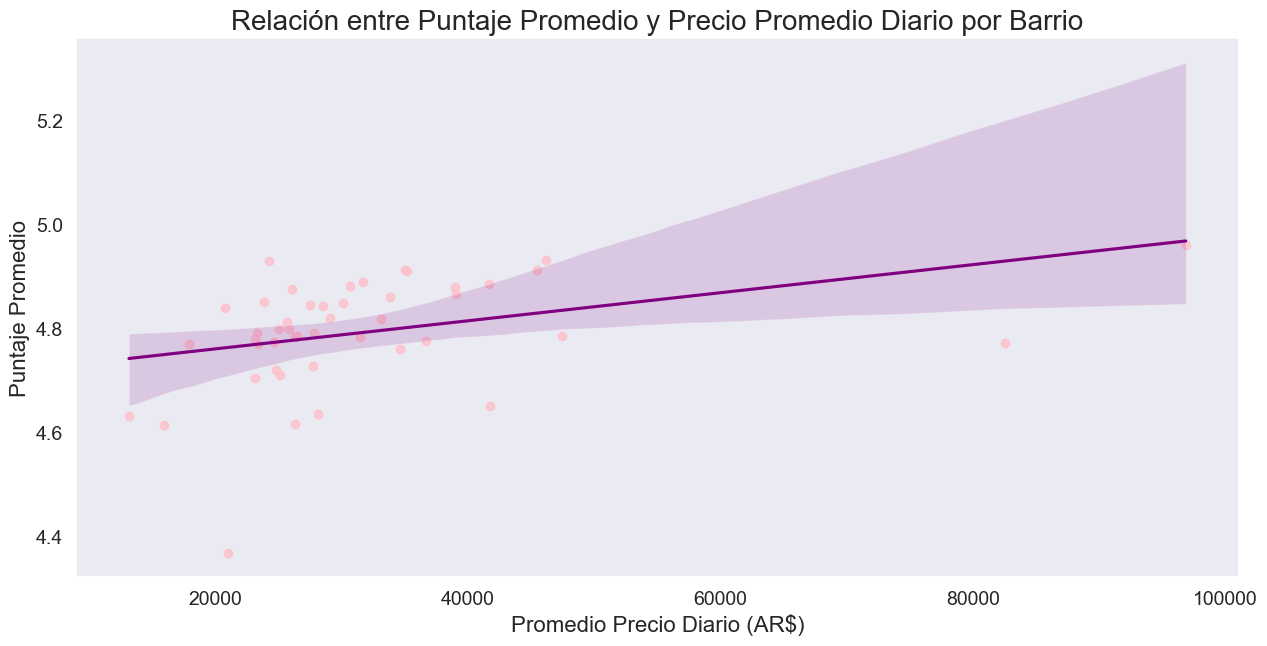

In [74]:
feq_reviews = listings[listings['number_of_reviews'] >= 10]
feq_accommodates = listings[listings['accommodates'] == 2]

mean_scores_by_neighbourhood = feq_reviews.groupby('neighbourhood')['review_scores_location'].mean()
mean_prices_by_neighbourhood = feq_accommodates.groupby('neighbourhood')['price'].mean()
data = pd.DataFrame({'Mean Review Score': mean_scores_by_neighbourhood, 'Mean Daily Price': mean_prices_by_neighbourhood})
plt.figure(figsize=(15, 7))
sns.regplot(x='Mean Daily Price', y='Mean Review Score', data=data, scatter_kws={'color': 'pink'}, line_kws={'color': 'purple'})
plt.title('Relación entre Puntaje Promedio y Precio Promedio Diario por Barrio', fontsize=20)
plt.xlabel('Promedio Precio Diario (AR$)', fontsize=16)
plt.ylabel('Puntaje Promedio', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(False)  # Quitar la cuadrícula
plt.show()

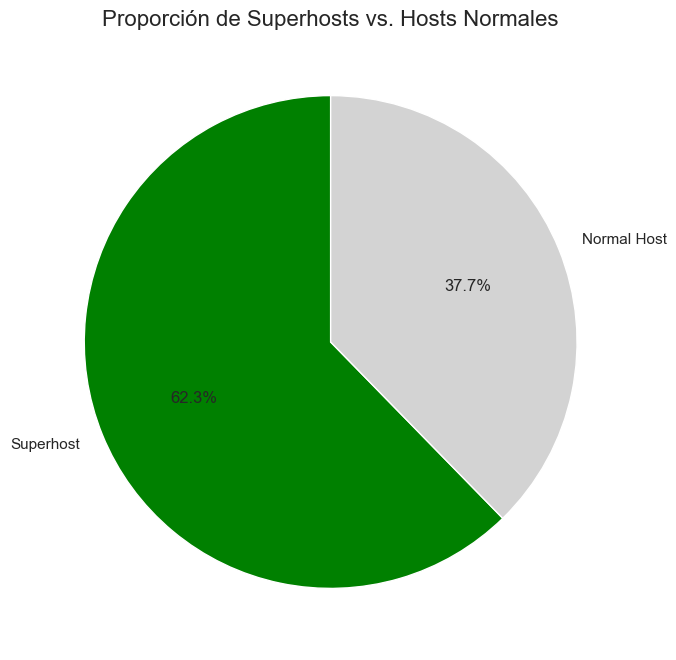

In [75]:
feq = listings['host_is_superhost'].value_counts()

colors = ['green', 'lightgray']
labels = ['Superhost', 'Normal Host']

plt.figure(figsize=(8, 8))
feq.plot.pie(autopct='%1.1f%%', colors=colors, labels=labels, startangle=90)
plt.title("Proporción de Superhosts vs. Hosts Normales", fontsize=16)
plt.ylabel('')  # Eliminar la etiqueta del eje y
plt.show()

In [76]:
reviews_details.shape

(755607, 6)

In [77]:
reviews_details.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [78]:
listings.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'ratings', 'property_type', 'accommodates',
       'first_review', 'review_scores_value', 'review_scores_cleanliness',
       'review_scores_location', 'review_scores_accuracy',
       'review_scores_communication', 'review_scores_checkin',
       'review_scores_rating', 'maximum_nights', 'listing_url',
       'host_is_superhost', 'host_about', 'host_response_time',
       'host_response_rate'],
      dtype='object')

# Análisis Estadístico sobre la inseguridad


In [104]:
delitos = pd.read_csv('input/delitos_CABA.csv', encoding='utf-8')
delitos.drop('Hurtos totales', axis=1, inplace=True)
delitos.drop('Robos totales',axis=1, inplace=True)
delitos['Barrio'] = delitos['Barrio'].str.replace('\d+', '', regex=True)

delitos.copy().reset_index(drop=True, inplace=True)


¿Es Buenos Aires una ciudad segura para viajar?
Palermo, La Recoleta, Villa Crespo, Belgrano o Caballito son lugares seguros. 
https://www.elespanol.com/malaga/vivir/20230515/buenos-aires-ciudad-segura-viajar/763923781_0.html

-----------------------------------------------------

¿Es seguro viajar a Buenos Aires ?
Buenos Aires es en términos generales una ciudad bastante segura, y en muchos sitios se puede caminar con tranquilidad durante toda la noche, incluso una mujer sola.

Algunas zonas donde hay que tener cuidado por la noche son las inmediaciones de la estación ferroviaria de Constitución, el extremo oriental de San Telmo, algunas partes de Once y La Boca, donde, salvo en las calles turísticas, conviene extremar las precauciones incluso de día. Usar la cabeza es aconsejable en todas partes: no hacer ostentación de riqueza (joyas caras incluidas), fijarse siempre en lo que ocurre alrededor y dar la impresión de que se sabe con exactitud adónde se va (aunque no sea el caso).

Como todas las grandes ciudades, Buenos Aires no se halla exenta de problemas. Es mucho más probable que un turista sea víctima de delitos menores como robos de cartera o tirones que de un robo a mano armado o un  secuestro.
https://www.lonelyplanet.es/america-del-sur/argentina/buenos-aires/seguridad-y-alertas



In [106]:
delitos_sorted = delitos.loc[delitos.sum(axis=1).sort_values(ascending=False).index]


In [107]:
delitos_sorted['Barrio'] = delitos_sorted['Barrio'].apply(lambda x: x.split(' ', 1)[-1])
delitos_sorted.set_index('Barrio', inplace=True)
delitos_sorted_transposed = delitos_sorted.T

In [110]:
delitos_sorted_transposed.to_csv("stremlitapp/df_finals/delitos_sorted_transposed.csv")

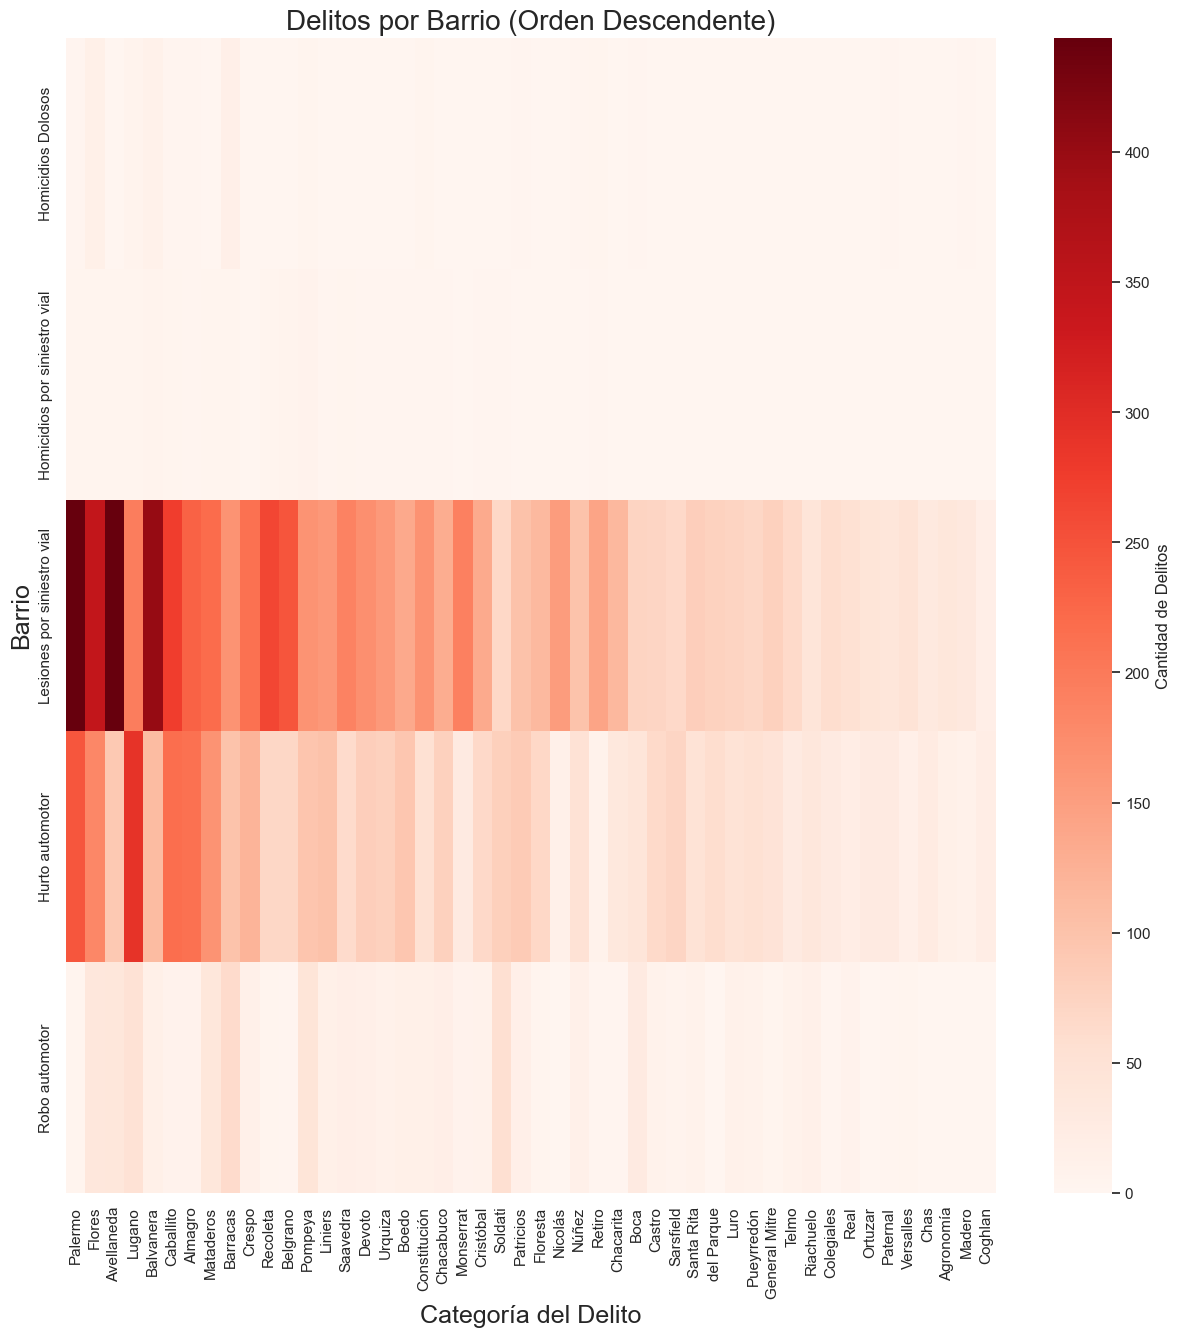

In [109]:


# Crear el heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(delitos_sorted_transposed, cmap='Reds', fmt='g', cbar_kws={'label': 'Cantidad de Delitos'})
plt.title('Delitos por Barrio (Orden Descendente)', fontsize=20)
plt.xlabel('Categoría del Delito', fontsize=18)
plt.ylabel('Barrio', fontsize=18)
plt.show()

### Hipótesis Nula (H0): 
No hay diferencia significativa en la seguridad entre los barrios de Buenos Aires considerados como seguros y aquellos que no se consideran seguros. En otras palabras, la tasa de incidentes delictivos reales en los barrios mencionados como seguros es igual a la tasa en los barrios no mencionados.

### Hipótesis Alternativa (H1): 
Existe una diferencia significativa en la seguridad  entre los barrios de Buenos Aires considerados como seguros y aquellos que no se consideran seguros. La tasa de incidentes delictivos reales en los barrios mencionados como seguros es diferente de la tasa en los barrios no mencionados

### Nivel de significancia

$\alpha$ = 0.05

In [ ]:
delitos = pd.read_csv('input/delitos_CABA.csv', encoding='utf-8')


In [ ]:
delitos.head()

,Barrio,Homicidios Dolosos,Homicidios por siniestro vial,Lesiones por siniestro vial,Hurtos totales,Hurto automotor,Robos totales,Robo automotor
0,Agronomía,0,1,39,126,14,108,1
1,Almagro,3,2,231,1358,212,1818,7
2,Balvanera,12,6,401,2499,110,2755,14
3,Barracas,16,5,165,958,99,1582,64
4,Belgrano,1,6,247,1316,71,1313,2


In [ ]:
from scipy.stats import ttest_ind

seguros = delitos[delitos['Barrio'].isin(['Palermo', 'La Recoleta', 'Villa Crespo', 'Belgrano', 'Caballito'])]['Hurtos totales']
no_seguros = delitos[~delitos['Barrio'].isin(['Palermo', 'La Recoleta', 'Villa Crespo', 'Belgrano', 'Caballito'])]['Hurtos totales']

statistic, p_value = ttest_ind(seguros, no_seguros, equal_var=False)

print("Estadístico de prueba:", statistic)
print("Valor p:", p_value)

Estadístico de prueba: 2.0992490626110523
Valor p: 0.12378031888918624


Estadístico de prueba: 2.0992490626110523
Valor p: 0.12378031888918624


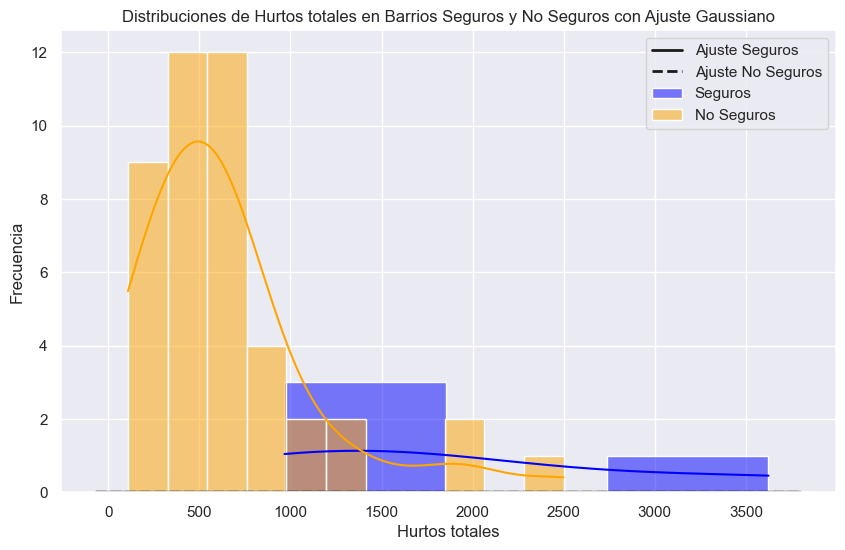

In [ ]:
from scipy.stats import ttest_ind, norm
seguros = delitos[delitos['Barrio'].isin(['Palermo', 'La Recoleta', 'Villa Crespo', 'Belgrano', 'Caballito'])]['Hurtos totales']
no_seguros = delitos[~delitos['Barrio'].isin(['Palermo', 'La Recoleta', 'Villa Crespo', 'Belgrano', 'Caballito'])]['Hurtos totales']

statistic, p_value = ttest_ind(seguros, no_seguros, equal_var=False)

print("Estadístico de prueba:", statistic)
print("Valor p:", p_value)

plt.figure(figsize=(10, 6))

sns.histplot(seguros, label='Seguros', kde=True, color='blue', alpha=0.5)
sns.histplot(no_seguros, label='No Seguros', kde=True, color='orange', alpha=0.5)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p1 = norm.pdf(x, seguros.mean(), seguros.std())
p2 = norm.pdf(x, no_seguros.mean(), no_seguros.std())
plt.plot(x, p1, 'k', linewidth=2, label='Ajuste Seguros')
plt.plot(x, p2, 'k--', linewidth=2, label='Ajuste No Seguros')

plt.title('Distribuciones de Hurtos totales en Barrios Seguros y No Seguros con Ajuste Gaussiano')
plt.xlabel('Hurtos totales')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [ ]:
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")

No hay suficiente evidencia para rechazar la hipótesis nula.


Se concluye que no hay diferencia significativa en la seguridad entre los barrios de Buenos Aires considerados como seguros y aquellos que no se consideran seguros. En otras palabras, la tasa de incidentes delictivos reales en los barrios mencionados como seguros es igual a la tasa en los barrios no mencionados.

## Disponibilidad de alojamiento

In [ ]:
calendar = pd.read_csv("input/calendar.csv", parse_dates=['date'], index_col=['listing_id'],encoding='utf-8')

In [ ]:
calendar.head()

,date,available,price,adjusted_price,minimum_nights,maximum_nights
listing_id,,,,,,
11508,2023-12-29,f,$65.00,NaN,3.0,1125.0
11508,2023-12-30,f,$65.00,NaN,3.0,1125.0
11508,2023-12-31,f,$65.00,NaN,3.0,1125.0
11508,2024-01-01,f,$65.00,NaN,3.0,1125.0
11508,2024-01-02,f,$65.00,NaN,3.0,1125.0


In [ ]:
nan_counts = calendar.isna().sum()
nan_counts

date                     0
available                0
price                    0
adjusted_price    12224859
minimum_nights           2
maximum_nights           2
dtype: int64

In [ ]:
calendar= pd.read_csv('input/calendar.csv')

In [ ]:
calendar

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,11508,2023-12-29,f,$65.00,NaN,3.0,1125.0
1,11508,2023-12-30,f,$65.00,NaN,3.0,1125.0
2,11508,2023-12-31,f,$65.00,NaN,3.0,1125.0
3,11508,2024-01-01,f,$65.00,NaN,3.0,1125.0
4,11508,2024-01-02,f,$65.00,NaN,3.0,1125.0
...,...,...,...,...,...,...,...
12224854,1054931988545514419,2024-12-22,f,$52.00,NaN,1.0,365.0
12224855,1054931988545514419,2024-12-23,f,$52.00,NaN,1.0,365.0
12224856,1054931988545514419,2024-12-24,f,$52.00,NaN,1.0,365.0
12224857,1054931988545514419,2024-12-25,f,$52.00,NaN,1.0,365.0


In [ ]:
listings_subset = listings[['accommodates']]
calendar_subset = calendar[['listing_id']]
calendar = pd.merge(calendar_subset, listings_subset, left_on='listing_id', right_index=True, how='left')

In [ ]:
listings.index.name = "listing_id"
calendar = pd.merge(calendar, listings[['accommodates']], on = "listing_id", how = "left")
calendar.sample(50)

,listing_id,accommodates_x,accommodates_y
8449448,900207533276265810,3,3
1543369,24141508,3,3
6847291,808576019809216809,2,2
11394510,1027669563556442479,2,2
10028008,974644614101114155,2,2
953218,14732144,2,2
3661549,46958979,2,2
3339810,42011957,4,4
11049399,1015849688035295992,3,3
1171519,18507588,1,1


In [ ]:
calendar= pd.read_csv('input/calendar.csv')
# Convertir la columna 'date' a tipo datetime64
calendar['date'] = pd.to_datetime(calendar['date'])

In [ ]:
sum_disponible = calendar[calendar.available == "t"].groupby(['date']).size().to_frame(name= 'available').reset_index()
sum_disponible['weekday'] = sum_disponible['date'].dt.day_name()
sum_disponible = sum_disponible.set_index('date')

sum_disponible.iplot(y='available', mode = 'lines', xTitle = 'Fecha', yTitle = 'Unidades disponibles',\
                   text='weekday', title = 'Unidades disponibles por fecha')

## ¿Qué dicen los visitantes?

### Minería de texto general sobre las reseñas

In [ ]:
reviews_details= pd.read_csv('input/reviews_details.csv')
listings= pd.read_csv('input/listings.csv')

In [ ]:
listings

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,11508,Condo in Buenos Aires · ★4.79 · 1 bedroom · 1 ...,42762,Candela,NaN,Palermo,-34.581840,-58.424150,Entire home/apt,96921.0,3,39,2023-11-30,0.28,1,298,6,NaN
1,14222,Rental unit in Palermo/Buenos Aires · ★4.77 · ...,87710233,María,NaN,Palermo,-34.586170,-58.410360,Entire home/apt,32123.0,7,114,2023-11-30,0.82,8,161,12,NaN
2,15074,Rental unit in Buenos Aires · 1 bedroom · 1 be...,59338,Monica,NaN,Núñez,-34.538920,-58.465990,Private room,24230.0,29,0,NaN,NaN,1,0,0,NaN
3,16695,Loft in Buenos Aires · ★4.28 · 1 bedroom · 1 b...,64880,Elbio Mariano,NaN,Monserrat,-34.614390,-58.376110,Entire home/apt,40303.0,2,45,2019-11-30,0.29,9,0,0,NaN
4,20062,Rental unit in Buenos Aires · ★4.93 · 2 bedroo...,75891,Sergio Damian,NaN,Palermo,-34.581848,-58.441605,Entire home/apt,138876.0,2,303,2023-12-26,1.83,4,92,30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33485,1054431162045157969,Rental unit in Buenos Aires · ★New · 2 bedroom...,190174045,Paula,NaN,Chacarita,-34.583393,-58.449506,Entire home/apt,44993.0,2,0,NaN,NaN,1,268,0,NaN
33486,1054454529559701183,Rental unit in Buenos Aires · ★New · 1 bedroom...,552579433,Alberto,NaN,San Nicolas,-34.600817,-58.378126,Entire home/apt,24182.0,3,0,NaN,NaN,1,87,0,NaN
33487,1054467234472982003,Rental unit in Buenos Aires · ★New · 5 bedroom...,479696958,Daniel,NaN,Palermo,-34.590375,-58.425384,Entire home/apt,128969.0,1,0,NaN,NaN,2,254,0,NaN
33488,1054474254373168834,Rental unit in Buenos Aires · ★New · 1 bedroom...,522972122,Marilyn,NaN,Balvanera,-34.599003,-58.411980,Entire home/apt,22570.0,1,0,NaN,NaN,2,264,0,NaN


In [ ]:
reviews_details.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [ ]:
reviews_details.shape

(755607, 6)

In [ ]:
listings.index.name = "listing_id"

In [ ]:
reviews_details = pd.merge(reviews_details, listings[['host_id', 'host_name', 'name']], on = "listing_id", how = "left")

In [ ]:
reviews_details = reviews_details.set_index('listing_id')

In [ ]:
reviews_details = reviews_details[['id', 'name', 'host_id', 'host_name', 'date', 'reviewer_id', 'reviewer_name', 'comments']]
reviews_details.head()

,id,name,host_id,host_name,date,reviewer_id,reviewer_name,comments
listing_id,,,,,,,,
11508,1615861,Condo in DOR · ★4.17 · Studio · 1 bed · 1 bath,56207781.0,Federico,2012-07-02,877808,Charlie,Amazing place!\r<br/>\r<br/>Location: short wa...
11508,3157005,Condo in DOR · ★4.17 · Studio · 1 bed · 1 bath,56207781.0,Federico,2012-12-26,656077,Shaily,Really enjoyed Candela's recommendations and q...
11508,3281011,Condo in DOR · ★4.17 · Studio · 1 bed · 1 bath,56207781.0,Federico,2013-01-05,2835998,Michiel,Candela and her colleague were very attentive ...
11508,6050019,Condo in DOR · ★4.17 · Studio · 1 bed · 1 bath,56207781.0,Federico,2013-07-28,4600436,Tara,"The apartment was in a beautiful, modern build..."
11508,9328455,Condo in DOR · ★4.17 · Studio · 1 bed · 1 bath,56207781.0,Federico,2013-12-22,3130017,Simon,My stay at Candela's apartment was very enjoya...


In [ ]:
host_reviews = reviews_details.groupby(['host_id', 'host_name']).size().sort_values(ascending=False).to_frame(name = "number_of_reviews")
host_reviews.head()

,,number_of_reviews
host_id,host_name,
514750642.0,Guillermo,377
11767520.0,Gonzalo,303
543854446.0,Ignacio,154
67086449.0,Rodrigo,114
60886570.0,Santiago,112


In [ ]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ariel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ariel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ariel\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

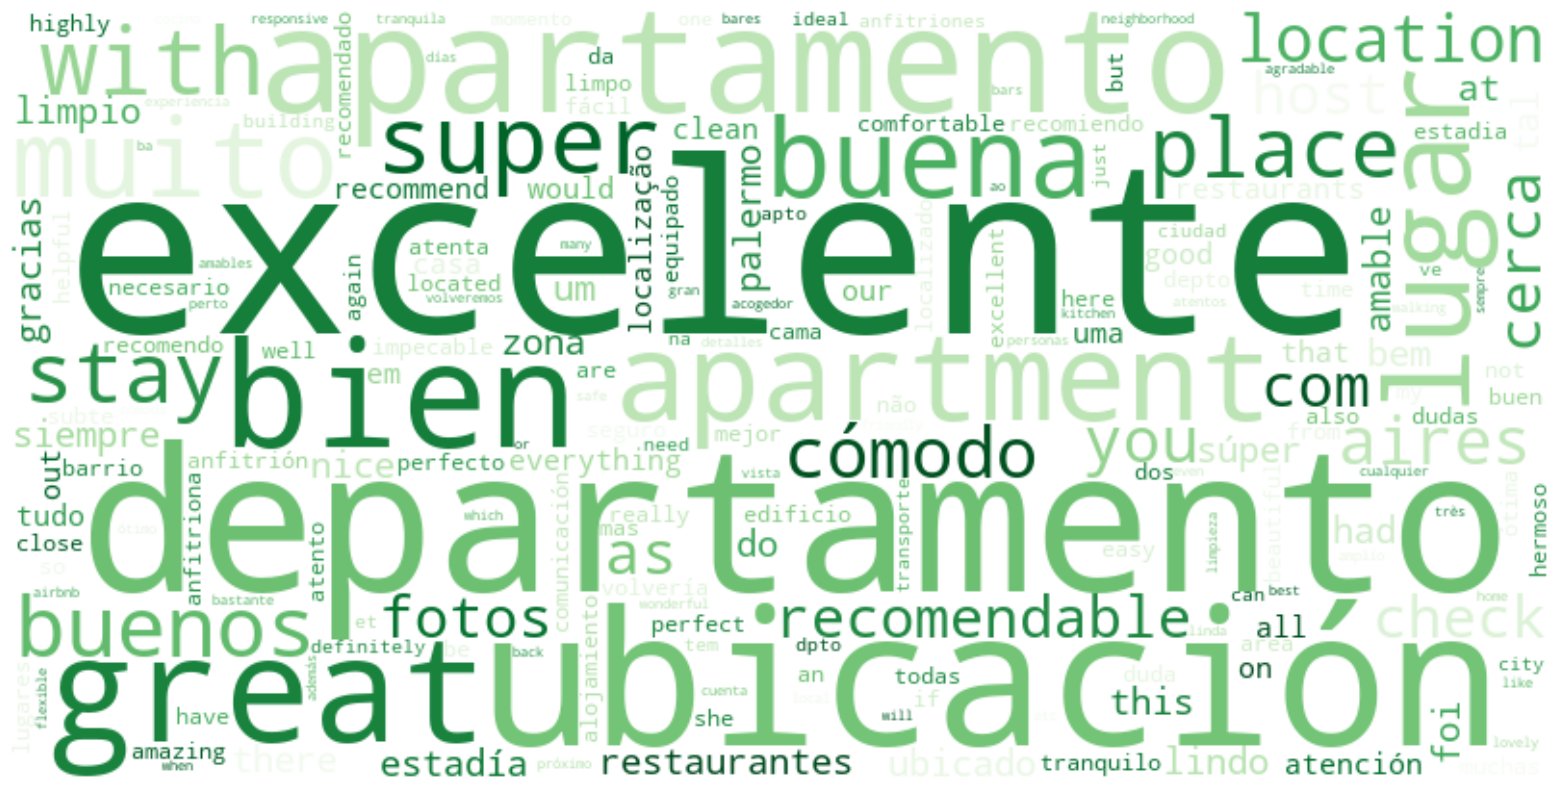

In [ ]:
reviews_details = reviews_details[reviews_details['comments'].notnull()]
reviews_details['comments'] = reviews_details['comments'].str.replace('\d+', '')
reviews_details['comments'] = reviews_details['comments'].str.lower()
reviews_details['comments'] = reviews_details['comments'].str.replace('\r\n', "")
stop_spanish = set(stopwords.words("spanish") + ["br", "si", "de", "mi","us","the","it","was","in","to","is","of","very","muy","for","and","we","were"])
reviews_details['comments'] = reviews_details['comments'].apply(lambda x: " ".join([i for i in x.split() 
                                                      if i not in (stop_spanish)]))
reviews_details['comments'] = reviews_details['comments'].str.replace('[^\w\s]', " ")
reviews_details['comments'] = reviews_details['comments'].str.replace('\s+', ' ')
texts = reviews_details.comments.tolist()
vec = CountVectorizer().fit(texts)
bag_of_words = vec.transform(texts)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
cvec_df = pd.DataFrame.from_records(words_freq, columns=['words', 'counts']).sort_values(by="counts", ascending=False)
cvec_dict = dict(zip(cvec_df.words, cvec_df.counts))
wordcloud = WordCloud(width=800, height=400, colormap='Greens', background_color='white')
wordcloud.generate_from_frequencies(frequencies=cvec_dict)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Minería de texto sobre la seguridad y sus consideraciones

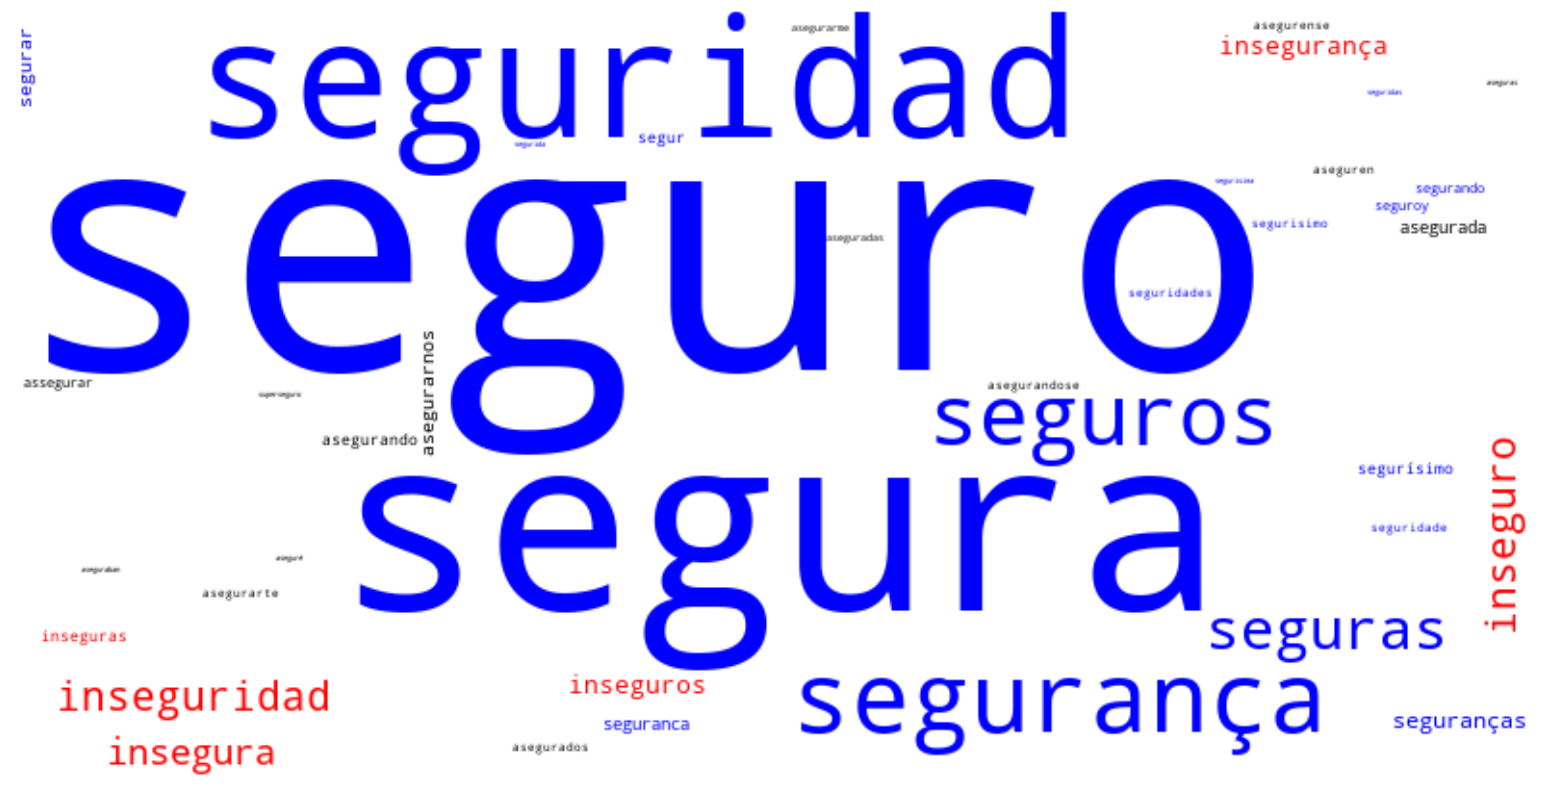

In [ ]:
reviews_details = reviews_details[reviews_details['comments'].notnull()]

reviews_details['comments'] = reviews_details['comments'].str.replace('\d+', '')
reviews_details['comments'] = reviews_details['comments'].str.lower()
reviews_details['comments'] = reviews_details['comments'].str.replace('\r\n', "")
stop_spanish = set(stopwords.words("spanish") + ["br", "si", "de", "mi", "seguramente", "asegurarse", "asegurándose", "aseguraron", "asegura", "aseguraba", "aseguraba", "asegurado", "aseguró", "aseguran", "asegurar", "aseguro"])
reviews_details['comments'] = reviews_details['comments'].apply(lambda x: " ".join([i for i in x.split() if i not in stop_spanish]))
reviews_details['comments'] = reviews_details['comments'].str.replace('[^\w\s]', " ")
reviews_details['comments'] = reviews_details['comments'].str.replace('\s+', ' ')
texts = reviews_details.comments.tolist()
vec = CountVectorizer().fit(texts)
bag_of_words = vec.transform(texts)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
cvec_df = pd.DataFrame.from_records(words_freq, columns=['words', 'counts']).sort_values(by="counts", ascending=False)

security_related_words = cvec_df[cvec_df['words'].str.contains('inseg|segur')]

security_dict = dict(zip(security_related_words['words'], security_related_words['counts']))

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if 'inseg' in word:
        return 'red'
    elif word.startswith('segur'):
        return 'blue'
    else:
        return 'black'  # Color por defecto

wordcloud_security = WordCloud(width=800, height=400, background_color='white', color_func=color_func)
wordcloud_security.generate_from_frequencies(frequencies=security_dict)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud_security, interpolation="bilinear")
plt.axis("off")
plt.show()

In [125]:
listings = pd.read_csv('stremlitapp\df_finals\listings.csv')
listings_details = pd.read_csv('stremlitapp/df_finals/listings_details.csv')
neighbourhoods = pd.read_csv('stremlitapp/df_finals/neighbourhoods.csv')
delitos = pd.read_csv('stremlitapp/df_finals/delitos.csv')
delitos_sorted_transposed = pd.read_csv('stremlitapp/df_finals/delitos_sorted_transposed.csv')

In [133]:
listings_details.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11508,https://www.airbnb.com/rooms/11508,20231226203815,2023-12-29,city scrape,Condo in Buenos Aires · ★4.79 · 1 bedroom · 1 ...,NaN,AREA: PALERMO SOHO<br /><br />Minutes walking ...,https://a0.muscache.com/pictures/19357696/b1de...,42762,https://www.airbnb.com/users/show/42762,Candela,2009-10-01,"New York, NY",-,within an hour,100%,89%,t,https://a0.muscache.com/im/users/42762/profile...,https://a0.muscache.com/im/users/42762/profile...,Palermo,1.0,2.0,"['email', 'phone']",t,t,"Buenos Aires, Capital Federal, Argentina",Palermo,NaN,-34.581840,-58.424150,Entire condo,Entire home/apt,2,NaN,1 bath,NaN,1.0,[],"$96,921.00",3,1125,3,3,1125,1125,3.0,1125.0,NaN,t,0,0,23,298,2023-12-29,39,6,1,2012-07-02,2023-11-30,4.79,4.92,4.87,4.92,4.97,4.92,4.87,NaN,f,1,1,0,0,0.28
1,14222,https://www.airbnb.com/rooms/14222,20231226203815,2023-12-28,city scrape,Rental unit in Palermo/Buenos Aires · ★4.77 · ...,NaN,Palermo is such a perfect place to explore the...,https://a0.muscache.com/pictures/4695637/bbae8...,87710233,https://www.airbnb.com/users/show/87710233,María,2016-08-03,"Buenos Aires, Argentina","Soy Organizadora de Eventos, me gusta relacion...",within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/dc9d9...,https://a0.muscache.com/im/pictures/user/dc9d9...,Barrio Norte,11.0,15.0,"['email', 'phone']",t,t,"Palermo/Buenos Aires, Autonomous City of Bueno...",Palermo,NaN,-34.586170,-58.410360,Entire rental unit,Entire home/apt,2,NaN,1 bath,NaN,1.0,[],"$32,123.00",7,100,7,7,1125,1125,7.0,1125.0,NaN,t,11,41,71,161,2023-12-28,114,12,1,2012-07-10,2023-11-30,4.77,4.75,4.77,4.81,4.89,4.87,4.75,NaN,f,8,8,0,0,0.82
2,15074,https://www.airbnb.com/rooms/15074,20231226203815,2023-12-29,previous scrape,Rental unit in Buenos Aires · 1 bedroom · 1 be...,NaN,NaN,https://a0.muscache.com/pictures/91166/c0fdcb4...,59338,https://www.airbnb.com/users/show/59338,Monica,2009-12-02,NaN,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,NaN,2.0,2.0,[],f,f,NaN,Nuñez,NaN,-34.538920,-58.465990,Private room in rental unit,Private room,1,NaN,1 bath,NaN,1.0,[],"$24,230.00",29,730,29,29,730,730,29.0,730.0,NaN,t,0,0,0,0,2023-12-29,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
3,16695,https://www.airbnb.com/rooms/16695,20231226203815,2023-12-28,city scrape,Loft in Buenos Aires · ★4.28 · 1 bedroom · 1 b...,NaN,San Telmo is one of the best neighborhoods in ...,https://a0.muscache.com/pictures/619c33a9-0618...,64880,https://www.airbnb.com/users/show/64880,Elbio Mariano,2009-12-21,"Buenos Aires, Argentina","I was borned in Tucuman, but I live in Buenos ...",within an hour,100%,100%,t,http